In [1]:
import pandas as pd

df = pd.read_csv('./nyc-taxi-trip-duration/train.csv') 

In [2]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
df.shape

(1458644, 11)

In [4]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

## Outliers Handling

In [5]:
TARGET = 'trip_duration'

def find_outliers(data):
    Q1 = df[TARGET].quantile(0.25)
    Q3 = df[TARGET].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = df[(df[TARGET] < lower_limit) | (df[TARGET] > upper_limit)]
    return outliers,lower_limit,upper_limit

In [6]:
outliers_df,lower_limit,upper_limit = find_outliers(df)

In [7]:
outliers_percentage = len(outliers_df)/len(df)
outliers_percentage*100

5.088287477958981

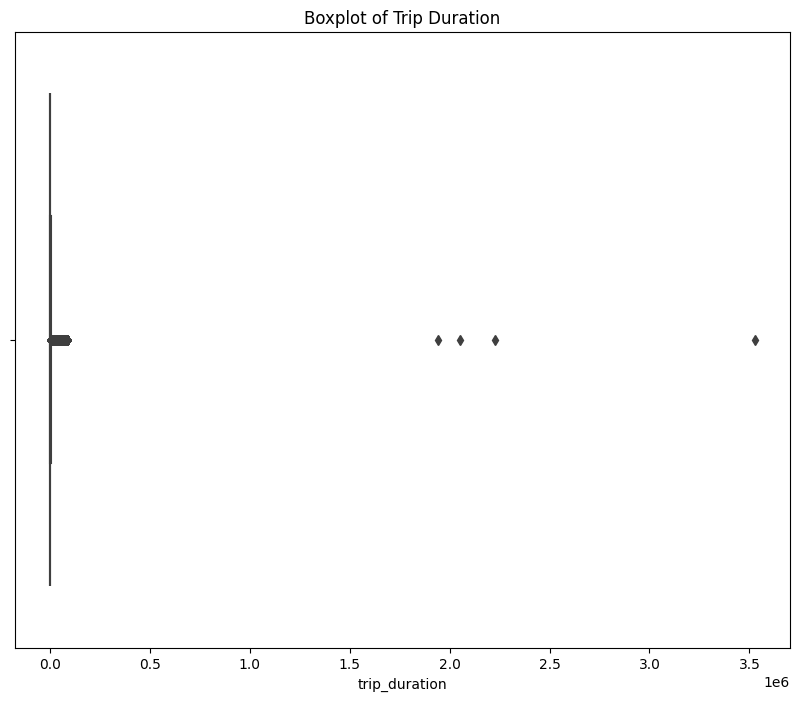

In [8]:
# 1. Box plot , best for outlier detection
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.boxplot(x=df['trip_duration'])
plt.title('Boxplot of Trip Duration')
plt.show()

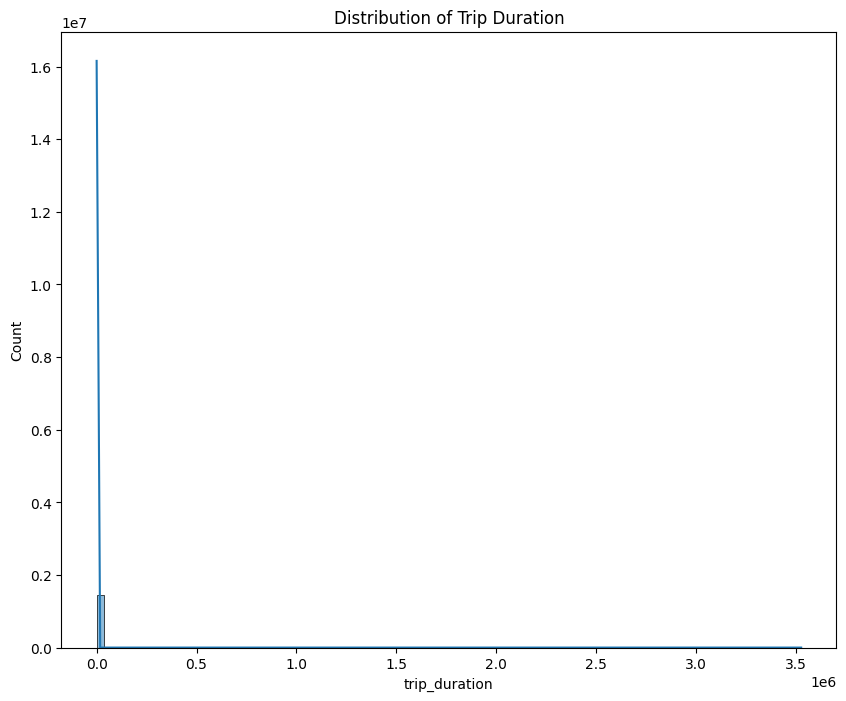

In [9]:
# 2. Histogram
plt.figure(figsize=(10,8))
sns.histplot(df['trip_duration'],bins=100,kde=True)
plt.title('Distribution of Trip Duration')
plt.show()

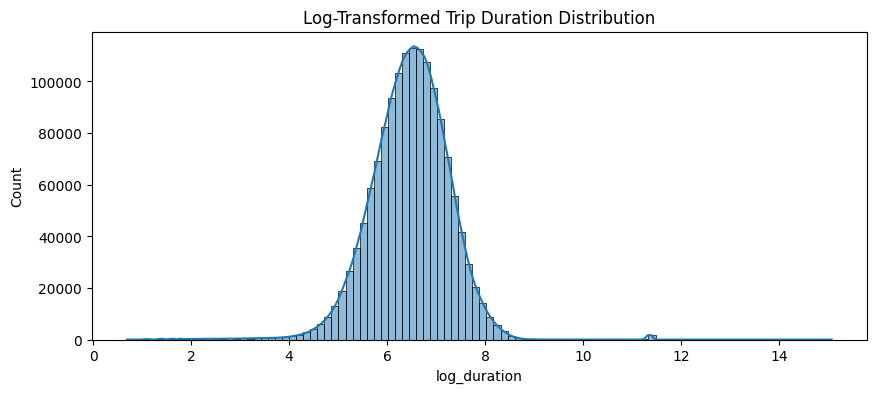

In [10]:
import numpy as np

df['log_duration'] = np.log1p(df['trip_duration'])

plt.figure(figsize=(10,4))
sns.histplot(df['log_duration'],bins=100,kde=True)
plt.title('Log-Transformed Trip Duration Distribution')
plt.show()

In [11]:
outliers_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
16,id3379579,2,2016-04-11 17:29:50,2016-04-11 18:08:26,1,-73.991165,40.755562,-73.999290,40.725353,N,2316
24,id3321406,2,2016-06-03 08:15:05,2016-06-03 08:56:30,1,-73.955231,40.777134,-73.788750,40.641472,N,2485
29,id1410897,1,2016-03-23 14:10:39,2016-03-23 14:49:30,1,-73.982117,40.756351,-73.865692,40.770988,N,2331
33,id0023813,1,2016-04-17 14:38:30,2016-04-17 15:16:19,1,-73.990311,40.756580,-73.870918,40.773930,N,2269
...,...,...,...,...,...,...,...,...,...,...,...
1458571,id1440046,1,2016-06-26 22:59:48,2016-06-26 23:40:42,2,-73.778946,40.647343,-73.952103,40.781166,N,2454
1458584,id1607338,2,2016-06-14 20:37:11,2016-06-14 21:16:06,1,-73.786697,40.641628,-73.996880,40.732506,N,2335
1458589,id2071901,1,2016-06-10 16:48:20,2016-06-10 17:23:13,2,-73.782280,40.644783,-73.904305,40.738285,N,2093
1458600,id0995846,2,2016-05-09 17:26:56,2016-05-09 18:30:37,2,-73.789543,40.647099,-73.960320,40.798180,N,3821


In [12]:
df[TARGET].min(),df[TARGET].max()

(1, 3526282)

In [13]:
lower_limit,upper_limit

(-620.0, 2092.0)

In [14]:
# Calculating the percentage of outliers higher than the upper limit

In [15]:
higher_outlier = len(df[df[TARGET]>upper_limit])/len(df[TARGET])
print(higher_outlier * 100)

5.088287477958981


In [16]:
df = df[df[TARGET]<upper_limit]

In [17]:
df.shape

(1384320, 12)

In [18]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

#Extract features
df['pickup_hour'] = df['pickup_datetime'].dt.hour.astype('category')
df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek.astype('category')
df['pickup_month'] = df['pickup_datetime'].dt.month.astype('category')
df['pickup_date'] = df['pickup_datetime'].dt.date

df['is_weekend'] = df['pickup_day_of_week'].isin([5,6]).astype(int).astype('category')

In [19]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_duration,pickup_hour,pickup_day_of_week,pickup_month,pickup_date,is_weekend
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,17,0,3,2016-03-14,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,0,6,6,2016-06-12,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,19,2,4,2016-04-06,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,13,5,3,2016-03-26,1
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,6.095825,22,5,1,2016-01-30,1


### Understand peak traffic hours

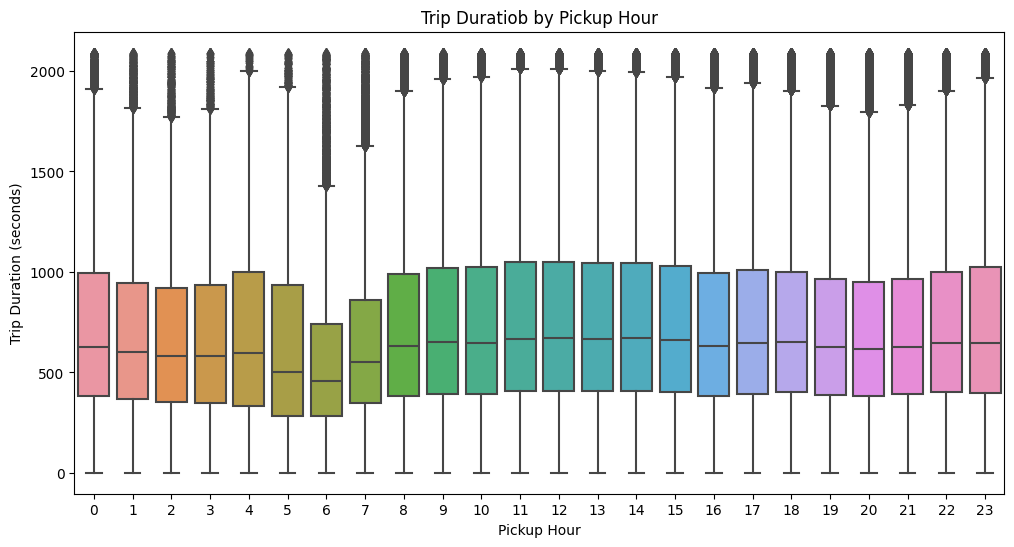

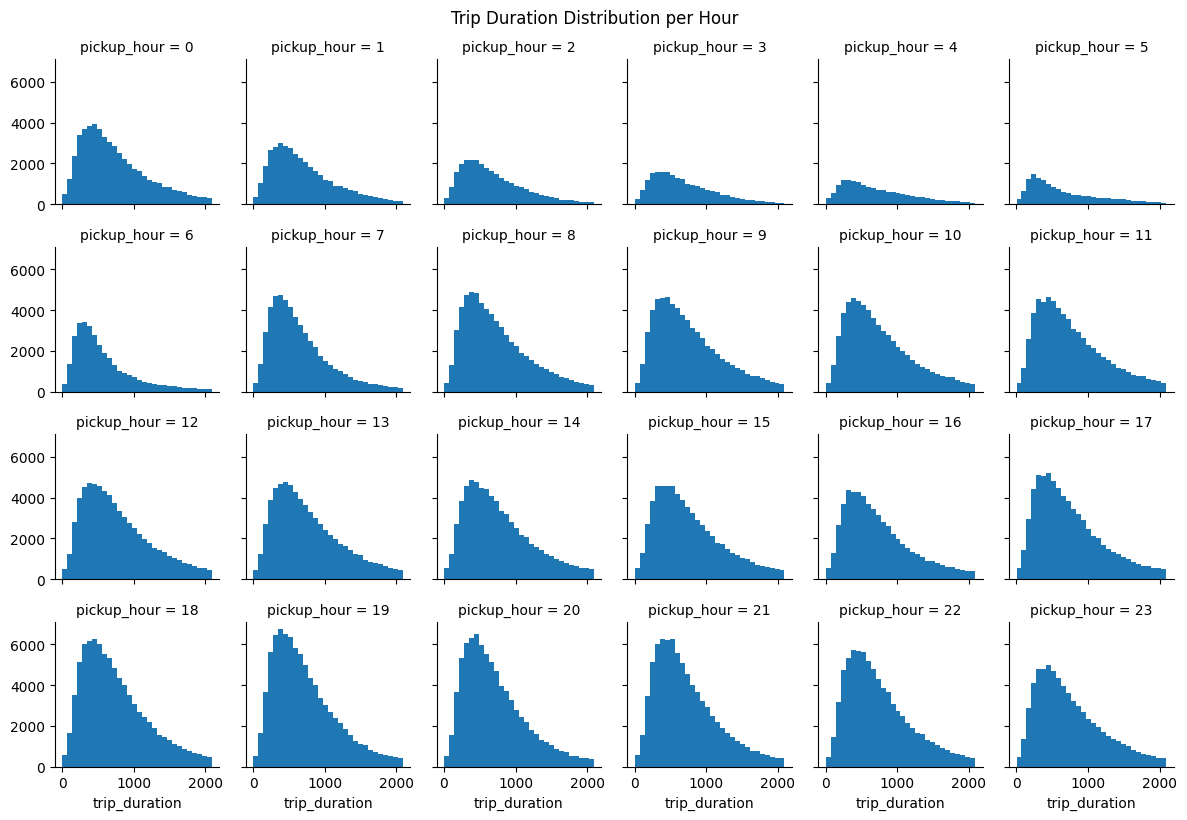

In [20]:
#  Trip Duration vs Pickup Hour
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(x=df['pickup_hour'],y=df['trip_duration'])
plt.title('Trip Duratiob by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Trip Duration (seconds)')
plt.show()


g = sns.FacetGrid(df, col='pickup_hour', col_wrap=6, height=2)
g.map(plt.hist, 'trip_duration', bins=30)
plt.suptitle("Trip Duration Distribution per Hour", y=1.02)
plt.show()

Trip durations are highest around 18,19,20,21 hour(s), and lowest around 2,3,4,5 hour(s).

1. Histogram for Number of Trips Per Hour

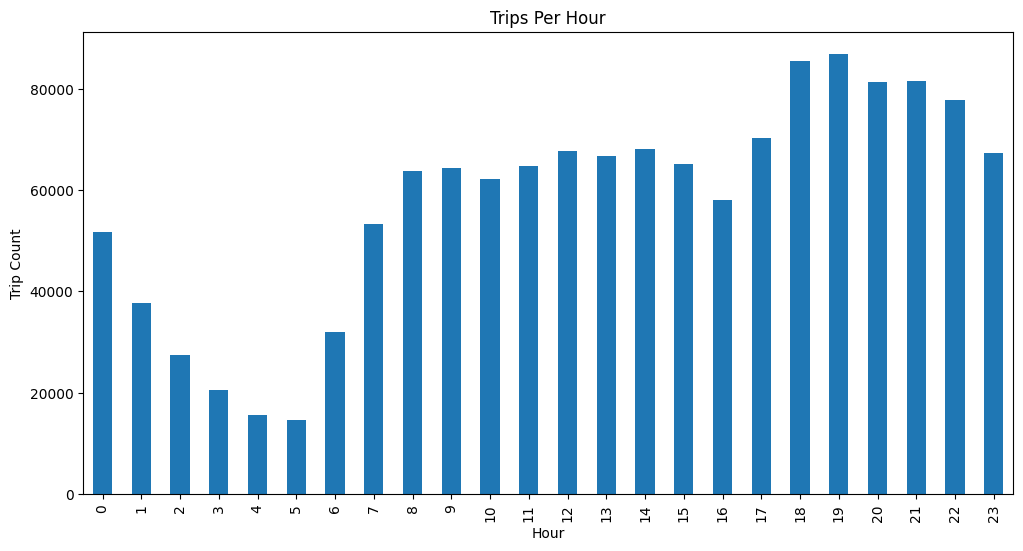

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

df['pickup_hour'].value_counts().sort_index().plot(kind='bar',figsize=(12,6))
plt.title('Trips Per Hour')
plt.xlabel('Hour')
plt.ylabel('Trip Count')
plt.show()

* The highest concentration of rides occurs around <b>18-22</b> hour(s), likely due to (~~morning commute ~~~  / evening rush /   ~~nightlife peak~~).
* Ride volume drops significantly after <b>24</b>, which makes sense as traffic typically slows down late at night.
*There is a noticeable increase during <b>8 - 23</b>, which may indicate office commute hours / airport peak timings / late-night travel.

👉 What this means for the model:

    Different hours have very different traffic patterns, which can significantly influence trip duration — making pickup_hour a valuable feature.

2.Trips Per Day of Work

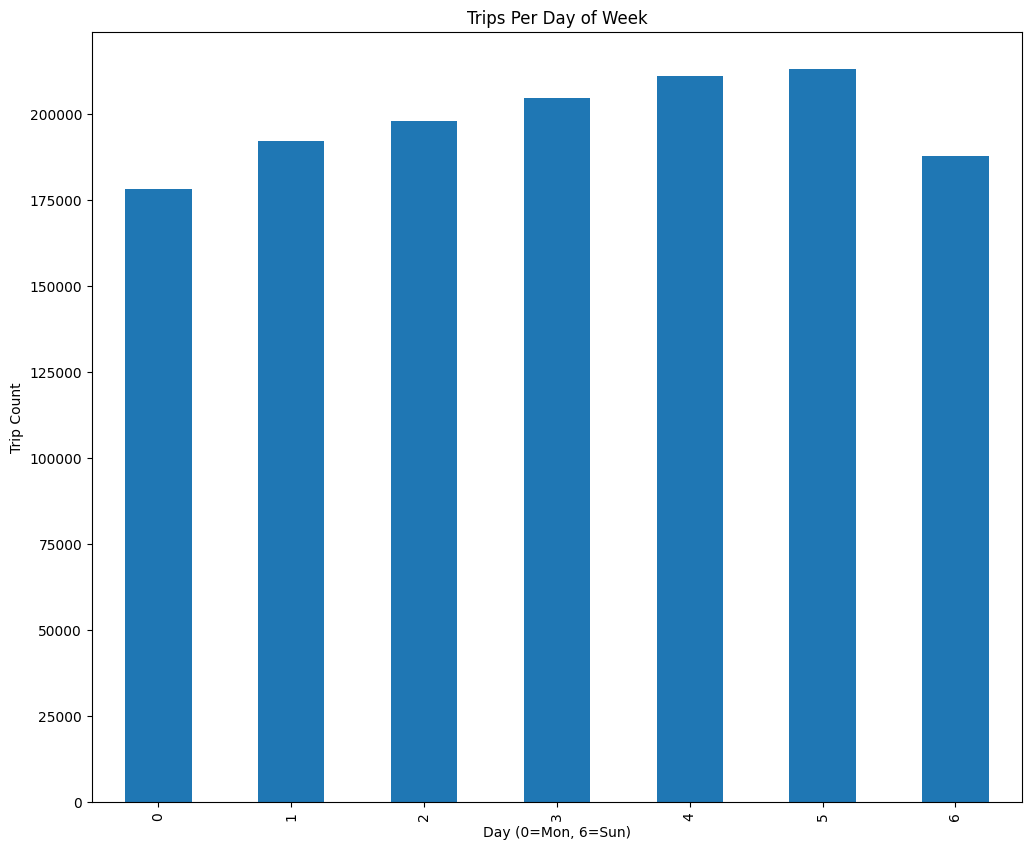

In [22]:
df['pickup_day_of_week'].value_counts().sort_index().plot(kind='bar',figsize=(12,10))
plt.title('Trips Per Day of Week')
plt.xlabel('Day (0=Mon, 6=Sun)')
plt.ylabel('Trip Count')
plt.show()

* The highest number of rides occurs on Saturday (5), while Monday(0) sees the lowest volume.

This may reflect commute-heavy weekdays, versus leisure-driven weekend travel.

👉 What this means for the model:
Traffic congestion varies sharply between weekdays and weekends, making pickup_day_of_week and is_weekend important predictors.

3. Number of trips per month

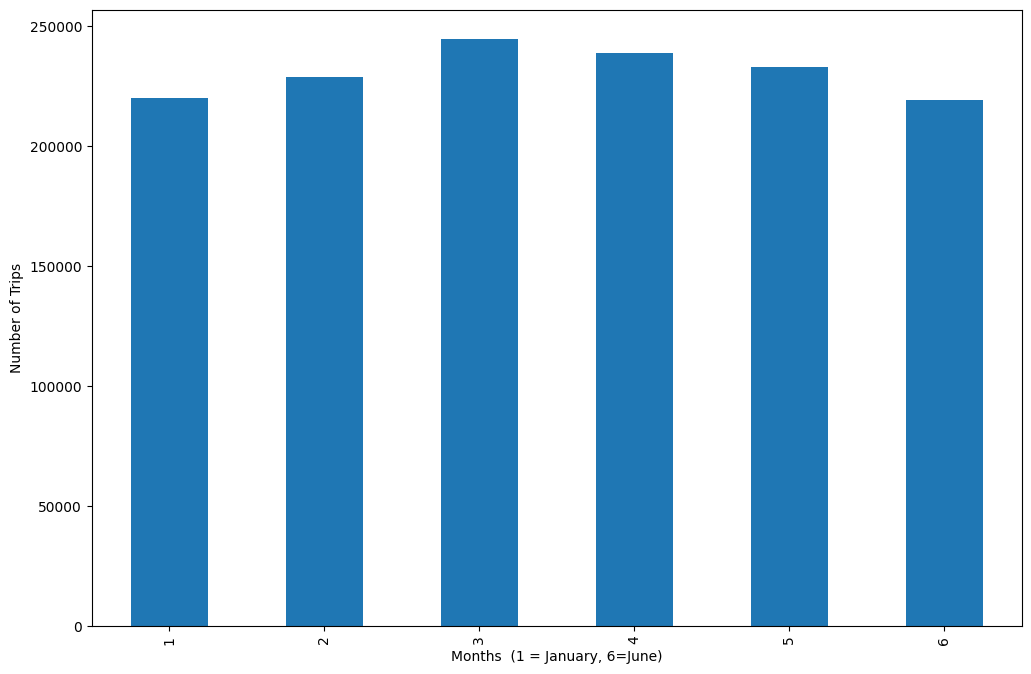

In [23]:
df['pickup_month'].value_counts().sort_index().plot(kind='bar',figsize=(12,8))
plt.xlabel('Months  (1 = January, 6=June)')
plt.ylabel('Number of Trips')
plt.show()

* Trip volume is highest in March month.

Any spikes or dips may also correspond to specific city events or seasonal patterns.

👉 What this means for the model:
Seasonal traffic changes can impact travel times; pickup_month captures these long-term patterns.

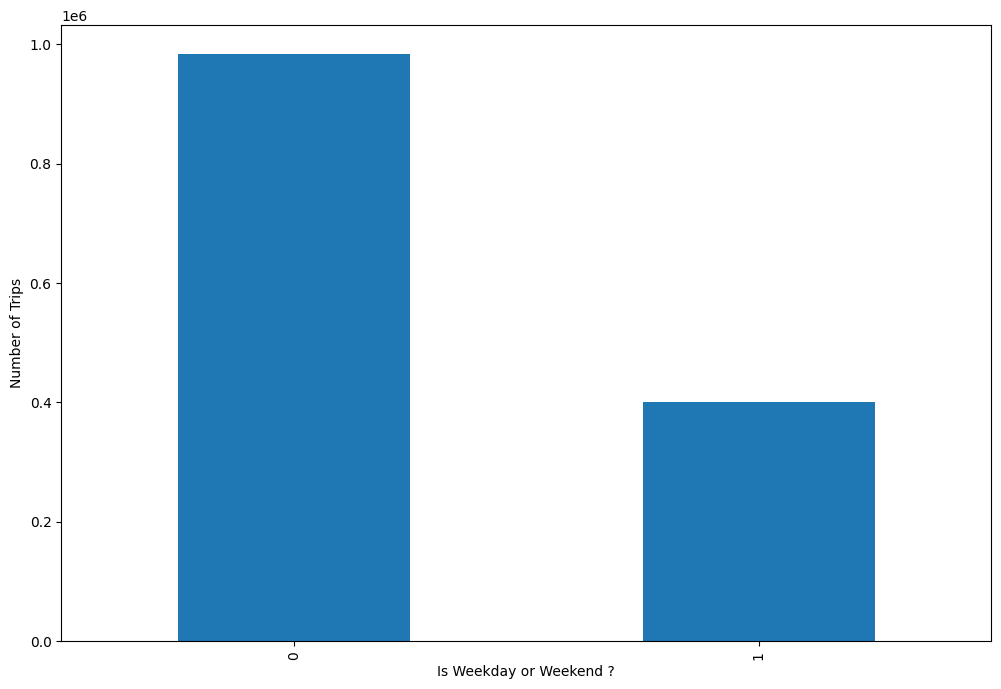

In [24]:
# Trip Counts Based on Weekends v/s Weekdays

df['is_weekend'].value_counts().sort_index().plot(kind='bar',figsize=(12,8))
plt.xlabel('Is Weekday or Weekend ?')
plt.ylabel('Number of Trips')
plt.show()

Weekdays show <b>more</b> trip counts, while weekends show <b>less</b> trip counts.
This suggests that travel demand is primarily driven by office commute.
(e.g., office commute, business travel, leisure activities).

## **4. Geo-Spatial Feature Engineering**

### 📍 **Distance Calculation**

- How do we calculate the Haversine distance between pickup and dropoff coordinates?
- Does Manhattan distance make sense for NYC roads?

The Haversine distance represents the straight-line distance between the pickup and dropoff coordinates.
We used this feature because it captures the baseline geographical separation between two points.
Higher Haversine distance values naturally indicate longer travel paths, which can help the model estimate trip duration.

In [25]:
import numpy as np
def haversine_distance(lat1,lon1,lat2,lon2):
    R = 6371 # Earth radius in KM
    
    lat1,lon1,lat2,lon2 = map(np.radians,[lat1,lon1,lat2,lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat / 2)**2 + np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c
df['haversine_km'] = haversine_distance(df['pickup_latitude'],
                                       df['pickup_longitude'],
                                       df['dropoff_latitude'],
                                       df['dropoff_longitude'])
    

In [26]:
df[['haversine_km','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']]

,haversine_km,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,1.715633,40.767937,-73.982155,40.765602,-73.964630
1,2.021165,40.738564,-73.980415,40.731152,-73.999481
3,1.489284,40.719971,-74.010040,40.706718,-74.012268
4,1.188605,40.793209,-73.973053,40.782520,-73.972923
5,1.183559,40.742195,-73.982857,40.749184,-73.992081
...,...,...,...,...,...
1458639,1.366628,40.745522,-73.982201,40.740170,-73.994911
1458640,6.224756,40.747379,-74.000946,40.796547,-73.970184
1458641,8.117401,40.768799,-73.959129,40.707371,-74.004433
1458642,1.148733,40.749062,-73.982079,40.757107,-73.974632


In [27]:
def manhattan_distance(lat1,lon1,lat2,lon2):
    #Distance when moving only vertically (north/south)
    a = haversine_distance(lat1,lon1,lat2,lon1)
    #Distance when moving only horizontally (east/west)
    b = haversine_distance(lat1,lon1,lat1,lon2)
    return a + b

df['manhattan_km'] = manhattan_distance(
                     df['pickup_latitude'],
                    df['pickup_longitude'],
                    df['dropoff_latitude'],
                    df['dropoff_longitude']
            )

In [28]:
df[['manhattan_km','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']]

,manhattan_km,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,1.955445,40.767937,-73.982155,40.765602,-73.964630
1,2.669564,40.738564,-73.980415,40.731152,-73.999481
3,1.689242,40.719971,-74.010040,40.706718,-74.012268
4,1.201087,40.793209,-73.973053,40.782520,-73.972923
5,1.669853,40.742195,-73.982857,40.749184,-73.992081
...,...,...,...,...,...
1458639,1.825314,40.745522,-73.982201,40.740170,-73.994911
1458640,8.444433,40.747379,-74.000946,40.796547,-73.970184
1458641,11.214421,40.768799,-73.959129,40.707371,-74.004433
1458642,1.615257,40.749062,-73.982079,40.757107,-73.974632


### 🧭 **Direction Features**

- How do we compute bearing (direction angle) from pickup to dropoff location?
- Can bearing help distinguish short vs long routes?

In [29]:
def calculate_bearing(lat1,lon1,lat2,lon2):
    lat1,lon1,lat2,lon2 = map(np.radians,[lat1,lon1,lat2,lon2])
    
    dlon = lon2 - lon1
    
    x = np.sin(dlon) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(dlon)
    
    bearing = np.degrees(np.arctan2(x,y))
    return bearing

df['bearing'] = calculate_bearing(df['pickup_latitude'],
                                  df['pickup_longitude'],
                                  df['dropoff_latitude'],
                                  df['dropoff_longitude']
                                 )

### 🚕 **Speed Features**

- Does creating average speed = distance / time help identify anomalies?

In [30]:
# Convert duration from seconds to hours
df['duration_hours'] = df['trip_duration'] / 3600

# Average speed in km/h
df['average_speed'] = df['haversine_km'] / df['duration_hours']

In [31]:
print('DataFrames with Extremely High Speeds')
df[df['average_speed'] > 200][['average_speed','trip_duration']]

DataFrames with Extremely High Speeds


,average_speed,trip_duration
1107,1351.907197,2
107171,258.472562,16
133641,657.266933,8
171801,339.534370,12
176589,234.167898,88
...,...,...
1327633,215.727070,167
1328401,257.365801,187
1359910,616.394037,548
1390507,539.009013,5


In [32]:
print('DataFrames with Extremely Low Speeds')
df[df['average_speed'] < 1][['average_speed','trip_duration']]

DataFrames with Extremely Low Speeds


,average_speed,trip_duration
246,0.000000,227
291,0.000000,1109
323,0.376915,40
337,0.102578,1778
407,0.000000,947
...,...,...
1457136,0.000000,176
1457462,0.122583,25
1457746,0.766471,12
1458044,0.436294,7


In [33]:
# Remove speeds > 200 km/h (impossible for taxis)
df = df[df['average_speed'] < 200]

# Remove speeds < 1 km/h (likely idle / data issues)
df = df[df['average_speed'] > 1]

### Clustering Geohubs using K Means:

In [34]:
import hdbscan

pickup_coords = df[['pickup_latitude','pickup_longitude']].astype('float32')

clusterer = hdbscan.HDBSCAN(
    min_cluster_size = 500,
    min_samples = 50,
    cluster_selection_epsilon = 0.001
)

df['pickup_cluster'] = clusterer.fit_predict(pickup_coords)


dropoff_coords = df[['dropoff_latitude','dropoff_longitude']].astype('float32')

clusterer = hdbscan.HDBSCAN(
    min_cluster_size = 500,
    min_samples = 50,
    cluster_selection_epsilon = 0.001
)

df['dropoff_cluster'] = clusterer.fit_predict(dropoff_coords)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


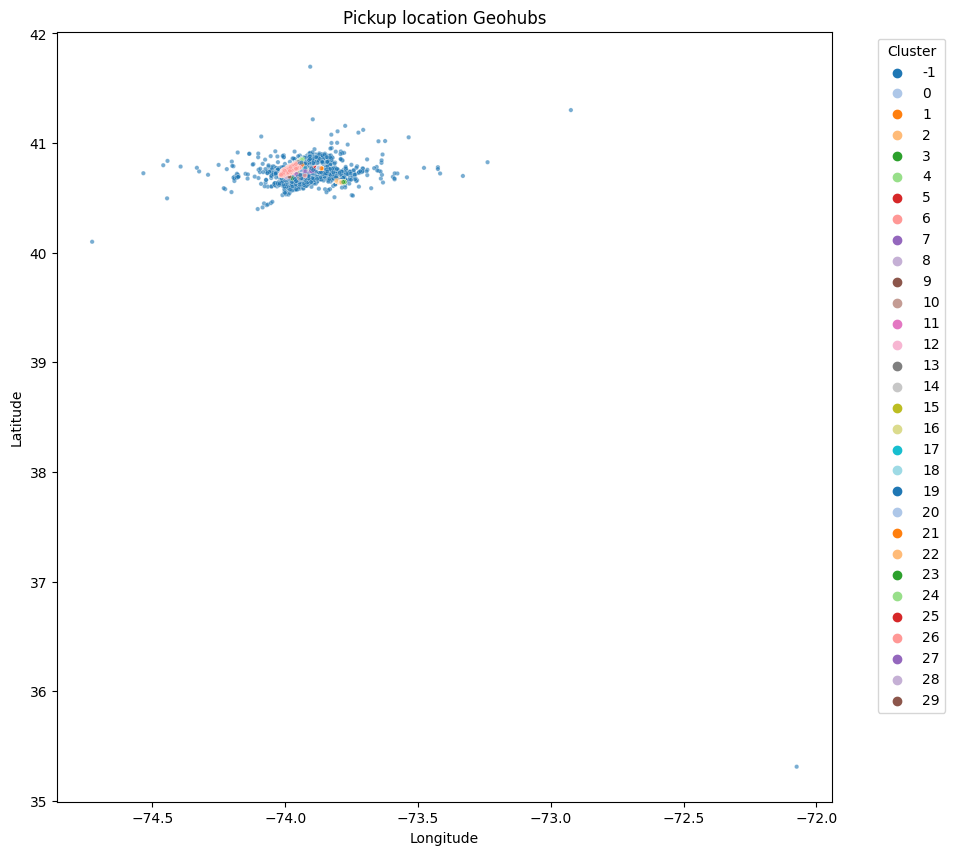

In [35]:
# 1. Plot Pickup Geohubs
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = df['pickup_longitude'],
    y = df['pickup_latitude'],
    hue = df['pickup_cluster'],
    palette = 'tab20',
    s = 10,
    alpha = 0.6
)

plt.title('Pickup location Geohubs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

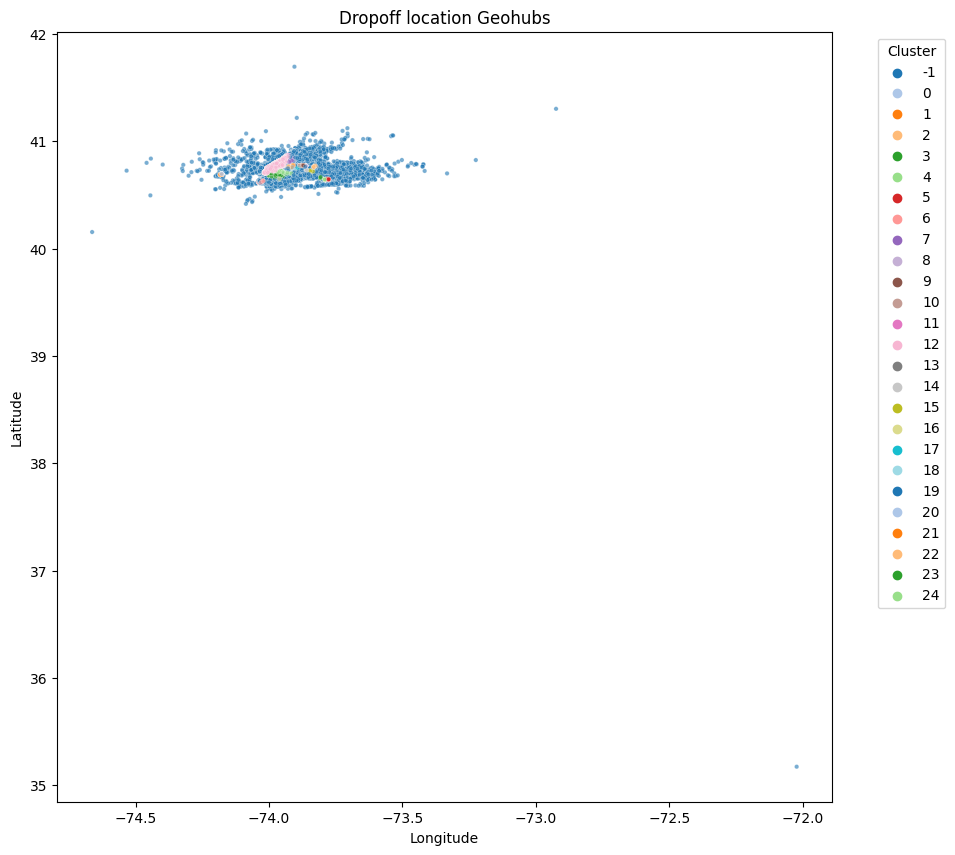

In [36]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    x = df['dropoff_longitude'],
    y = df['dropoff_latitude'],
    hue = df['dropoff_cluster'],
    palette = 'tab20',
    s = 10,
    alpha = 0.6
)

plt.title('Dropoff location Geohubs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## **. Feature Importance and Selection**

- Which features after engineering show strong correlation with trip duration?
- Should you remove highly correlated features?
- How do tree-based feature importances help?

In [37]:
df.corr(numeric_only=True)[TARGET].sort_values(ascending=False)

trip_duration        1.000000
duration_hours       1.000000
log_duration         0.915406
haversine_km         0.684904
manhattan_km         0.670506
dropoff_longitude    0.156588
pickup_longitude     0.148005
average_speed        0.015251
passenger_count      0.011007
vendor_id            0.003182
bearing             -0.001273
dropoff_cluster     -0.028318
pickup_latitude     -0.118255
dropoff_latitude    -0.118375
pickup_cluster      -0.178080
Name: trip_duration, dtype: float64

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
import sklearn
print("OK:", sklearn.__version__)

OK: 1.7.2


Train Val Split

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

TARGET = 'trip_duration'

X = df.drop(columns = [TARGET,'id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime','log_duration','duration_hours','pickup_date','store_and_fwd_flag'])
y = df[TARGET]

# ---- TRAIN/VAL SPLIT ----
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- TRAIN MODEL ----
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# ---- EVALUATE ----
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)

print("RMSE:", rmse)
print("MAE :", mae)

# ---- FEATURE IMPORTANCE ----
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))

RMSE: 1.9639992175197778
MAE : 0.5756038037287603
haversine_km          7.039447e-01
average_speed         2.957908e-01
manhattan_km          2.358164e-04
pickup_latitude       3.903809e-06
pickup_longitude      3.811018e-06
bearing               3.650079e-06
dropoff_latitude      3.545344e-06
dropoff_longitude     3.507787e-06
pickup_hour           3.085959e-06
pickup_day_of_week    2.331980e-06
pickup_month          2.293861e-06
passenger_count       1.198599e-06
dropoff_cluster       5.809944e-07
pickup_cluster        3.992093e-07
is_weekend            3.716136e-07
dtype: float64


In [48]:
# 1. Fitting linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_val)

mae = mean_absolute_error(y_val,y_pred)
rmse = np.sqrt(mean_squared_error(y_val,y_pred))
r2 = r2_score(y_val,y_pred)

print("------------------Linear Regression Results------------------")
print(f'MAE : {mae}')
print(f'RMSE : {rmse}')
print(f'R2 Score : {r2}')

------------------Linear Regression Results------------------
MAE : 150.55342141425626
RMSE : 217.0390289462243
R2 Score : 0.764241947921885


In [60]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

y_train_xgb = np.log1p(y_train)
y_val_xgb = np.log1p(y_val)

dtrain = xgb.DMatrix(X_train,label=y_train_xgb,feature_names = list(X.columns.values),enable_categorical=True)
dval = xgb.DMatrix(X_val,label=y_val_xgb,feature_names = list(X.columns.values),enable_categorical=True)

params = {
    'objective':'reg:squarederror',
    'eval_metric':'rmse',
    'seed':42,
    'eta':0.05,
    'max_depth':6,
    'subsample':0.8,
    'colsample_bytree':0.8
}

evals = [(dtrain,'train'),(dval,'valid')]

model_xgb = xgb.train(params,dtrain,num_boost_round=2000,evals=evals,early_stopping_rounds=50,verbose_eval=100)

best_iter = model_xgb.best_iteration

[0]	train-rmse:0.66947	valid-rmse:0.66958
[100]	train-rmse:0.07106	valid-rmse:0.07043
[200]	train-rmse:0.06262	valid-rmse:0.06586
[300]	train-rmse:0.05666	valid-rmse:0.06571
[305]	train-rmse:0.05630	valid-rmse:0.06573


In [59]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# You already created:
# dtrain, dval using y_train_xgb = np.log1p(y_train), y_val_xgb = np.log1p(y_val)
# and trained model_xgb

# get best iteration / ntree limit robustly
best_iter = getattr(model_xgb, "best_iteration", None)

# predict in log space (use ntree_limit if available)
y_pred_log = model_xgb.predict(dval)

# 1) log-scale metrics (what training prints)
rmse_log = np.sqrt(mean_squared_error(y_val_xgb, y_pred_log))
mae_log = mean_absolute_error(y_val_xgb, y_pred_log)

# 2) convert back to original seconds and compute real metrics
y_pred_orig = np.expm1(y_pred_log)     # inverse of log1p
y_val_orig  = y_val                    # raw seconds

rmse_orig = np.sqrt(mean_squared_error(y_val_orig, y_pred_orig))
mae_orig  = mean_absolute_error(y_val_orig, y_pred_orig)
r2_orig   = r2_score(y_val_orig, y_pred_orig)

print("---- XGBoost (log-scale) ----")
print(f"log-RMSE: {rmse_log:.6f}, log-MAE: {mae_log:.6f}")
print("\n---- XGBoost (original scale, seconds) ----")
print(f"RMSE : {rmse_orig:.4f}")
print(f"MAE  : {mae_orig:.4f}")
print(f"R²   : {r2_orig:.4f}")

---- XGBoost (log-scale) ----
log-RMSE: 0.065734, log-MAE: 0.015289

---- XGBoost (original scale, seconds) ----
RMSE : 20.3939
MAE  : 9.3295
R²   : 0.9979
